✅ Archivo 'dataset_anonimizado_final.csv' cargado exitosamente.
   Total de estudiantes: 72

📊 REPORTE DE EDUCATIONAL DATA MINING

1️⃣ EFECTO NIVELADOR (Promedios):
                  Nota_Individual  Nota_Parejas  Mejora
Categoria                                              
Alto Rendimiento            15.51         17.87    2.36
Bajo Rendimiento             5.88         13.27    7.39

2️⃣ ANÁLISIS DE RESCATE ACADÉMICO:
   - Estudiantes en riesgo inicial (<10 pts): 33
   - Estudiantes rescatados (Aprobados en grupo): 22
   - 🚀 TASA DE RESCATE: 66.7%

📈 GENERANDO VISUALIZACIONES...


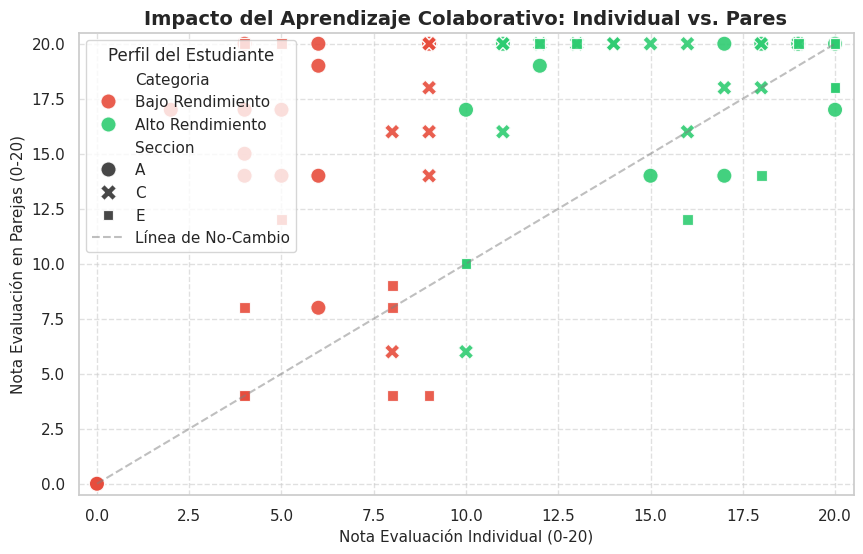

✅ Gráfico 'scatter_plot_impact.png' generado y guardado.


/tmp/ipython-input-1332443542.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


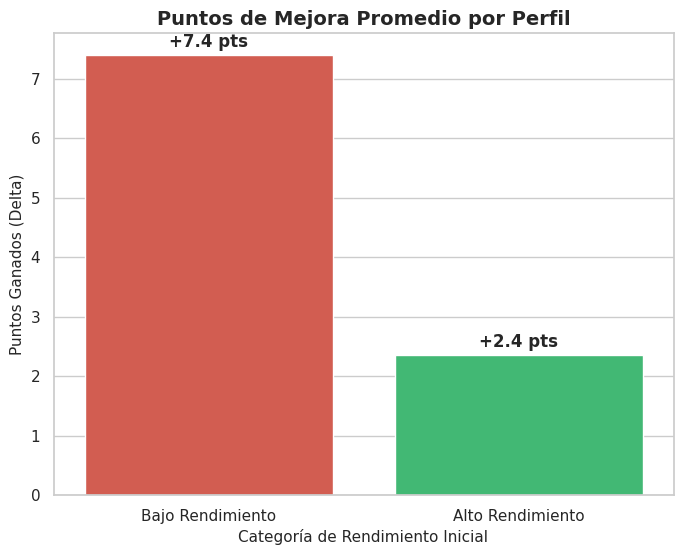

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. CARGA DE DATOS
# ==========================================
nombre_archivo = 'dataset_anonimizado_final.csv'

try:
    df = pd.read_csv(nombre_archivo)
    print(f"✅ Archivo '{nombre_archivo}' cargado exitosamente.")
    print(f"   Total de estudiantes: {len(df)}")
except FileNotFoundError:
    print(f"❌ ERROR: No se encuentra el archivo '{nombre_archivo}'.")
    print("   Por favor, súbelo al entorno de Colab antes de ejecutar.")

# ==========================================
# 2. CÁLCULO DE KEY INSIGHTS (HALLAZGOS)
# ==========================================

# Insight A: Efecto Nivelador (Comparación de promedios)
impacto = df.groupby('Categoria')[['Nota_Individual', 'Nota_Parejas', 'Mejora']].mean().round(2)

# Insight B: Tasa de Rescate (Recovery Rate)
# Estudiantes que tenían < 10 en individual
total_riesgo = df[df['Nota_Individual'] < 10]
# Estudiantes que lograron >= 10 en parejas dentro de ese grupo
rescatados = total_riesgo[total_riesgo['Nota_Parejas'] >= 10]

tasa_rescate = (len(rescatados) / len(total_riesgo)) * 100

# ==========================================
# 3. REPORTE DE TEXTO (OUTPUT)
# ==========================================
print("\n" + "="*40)
print("📊 REPORTE DE EDUCATIONAL DATA MINING")
print("="*40)

print("\n1️⃣ EFECTO NIVELADOR (Promedios):")
print(impacto)

print("\n2️⃣ ANÁLISIS DE RESCATE ACADÉMICO:")
print(f"   - Estudiantes en riesgo inicial (<10 pts): {len(total_riesgo)}")
print(f"   - Estudiantes rescatados (Aprobados en grupo): {len(rescatados)}")
print(f"   - 🚀 TASA DE RESCATE: {tasa_rescate:.1f}%")

print("\n" + "="*40)
print("📈 GENERANDO VISUALIZACIONES...")
print("="*40)

# ==========================================
# 4. VISUALIZACIÓN (GRÁFICOS PARA EL README)
# ==========================================
sns.set_theme(style="whitegrid")

# GRÁFICO 1: Scatter Plot (Impacto Individual vs Grupal)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Nota_Individual',
    y='Nota_Parejas',
    hue='Categoria',
    style='Seccion',
    s=120, # Tamaño de puntos
    palette={'Bajo Rendimiento': '#e74c3c', 'Alto Rendimiento': '#2ecc71'},
    alpha=0.9
)

# Línea de referencia (y=x) - Zona de "Sin cambios"
plt.plot([0, 20], [0, 20], '--', color='gray', alpha=0.5, label='Línea de No-Cambio')

plt.title('Impacto del Aprendizaje Colaborativo: Individual vs. Pares', fontsize=14, fontweight='bold')
plt.xlabel('Nota Evaluación Individual (0-20)', fontsize=11)
plt.ylabel('Nota Evaluación en Parejas (0-20)', fontsize=11)
plt.legend(title='Perfil del Estudiante', loc='upper left')
plt.xlim(-0.5, 20.5)
plt.ylim(-0.5, 20.5)
plt.grid(True, linestyle='--', alpha=0.6)

# Guardar imagen para el README
plt.savefig('scatter_plot_impact.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gráfico 'scatter_plot_impact.png' generado y guardado.")

# GRÁFICO 2: Barras de Mejora Promedio
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df,
    x='Categoria',
    y='Mejora',
    palette={'Bajo Rendimiento': '#e74c3c', 'Alto Rendimiento': '#2ecc71'},
    estimator=np.mean,
    errorbar=None
)

plt.title('Puntos de Mejora Promedio por Perfil', fontsize=14, fontweight='bold')
plt.ylabel('Puntos Ganados (Delta)', fontsize=11)
plt.xlabel('Categoría de Rendimiento Inicial', fontsize=11)

# Etiquetas de valor encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='+%.1f pts', padding=3, fontsize=12, fontweight='bold')

plt.show()